In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read dataset

dfCity=pd.read_csv("datasets/innercity.csv")
df = pd.read_csv("datasets/hepatitis.csv")
main_df = df


In [3]:
# MISSING VALUES FOR NUMERIC DATA
# fetch only int values 
import numpy as np
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [4]:
#-- Imputing missing value with mean of the coloumn
df[numeric_columns] = df[numeric_columns].fillna(df.mean())

In [5]:
#HANDLING MISSING VALUE FOR CATEGORICAL DATA
boolean_columns = df.select_dtypes(include=np.object).columns.tolist()
boolean_columns.remove('class')
df[boolean_columns] = df[boolean_columns].astype('bool')
df[boolean_columns].fillna(df.mode())

,sex,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices
0,True,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False
2,True,True,True,False,False,True,False,False,False,False,False
3,True,True,False,False,False,True,False,False,False,False,False
4,True,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,True,True,True,True,False,False,True,True,True
151,True,True,True,False,False,True,True,False,False,False,False
152,True,False,True,True,False,False,True,False,True,False,False
153,True,False,True,False,False,True,False,True,True,False,True


In [6]:
labels = df.iloc[:,19]
df = df.iloc[:,:18] #-- removing labels
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,True,False,False,False,False,False,False,False,False,False,False,False,1.0,85.000000,18.0,4.0,61.852273
1,50,True,False,False,True,False,False,False,False,False,False,False,False,0.9,135.000000,42.0,3.5,61.852273
2,78,True,True,False,True,False,False,True,False,False,False,False,False,0.7,96.000000,32.0,4.0,61.852273
3,31,True,True,True,False,False,False,True,False,False,False,False,False,0.7,46.000000,52.0,4.0,80.000000
4,34,True,True,False,False,False,False,True,False,False,False,False,False,1.0,105.325397,200.0,4.0,61.852273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,True,True,False,True,True,True,True,False,False,True,True,True,7.6,105.325397,242.0,3.3,50.000000
151,44,True,True,False,True,False,False,True,True,False,False,False,False,0.9,126.000000,142.0,4.3,61.852273
152,61,True,False,False,True,True,False,False,True,False,True,False,False,0.8,75.000000,20.0,4.1,61.852273
153,53,True,False,False,True,False,False,True,False,True,True,False,True,1.5,81.000000,19.0,4.1,48.000000


In [7]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dfCity["dayhours"])
dfCity["dayhours"] = le.transform(dfCity["dayhours"])


from sklearn.preprocessing import MinMaxScaler
for i in df:
    scaler = MinMaxScaler()
    df[[i]] = scaler.fit_transform(df[[i]])

In [8]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime
0,0.323944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.219331,0.006309,0.441860,0.618523
1,0.605634,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077922,0.405204,0.044164,0.325581,0.618523
2,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.051948,0.260223,0.028391,0.441860,0.618523
3,0.338028,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.051948,0.074349,0.059937,0.441860,0.800000
4,0.380282,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.294890,0.293375,0.441860,0.618523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.549296,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.948052,0.294890,0.359621,0.279070,0.500000
151,0.521127,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.077922,0.371747,0.201893,0.511628,0.618523
152,0.760563,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.064935,0.182156,0.009464,0.465116,0.618523
153,0.647887,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.155844,0.204461,0.007886,0.465116,0.480000


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,labels,test_size=0.2)

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 18)
(31, 18)
(124,)
(31,)


# Class imbalanced fixed

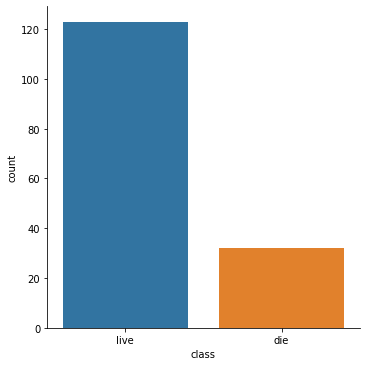

In [17]:
#---class imbalacing

#checking class imbalanceing fixed
sn.factorplot('class',data=main_df,kind='count')


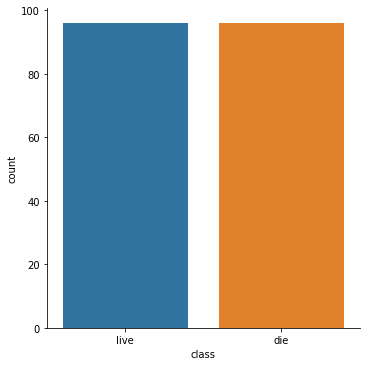

In [18]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train, y_train)
X_train = X_train_SMOTE
y_train = y_train_SMOTE
data = pd.DataFrame(y_train)
sn.factorplot('class',data=data,kind='count')

In [19]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.6)
print('correlated features: ', len(set(corr_features)) )


correlated features:  2


In [20]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((192, 16), (31, 16))

In [21]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS




In [26]:

sfs1 = SFS(RandomForestClassifier(n_jobs=4), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   10.0s finished

[2021-05-28 01:56:55] Features: 1/10 -- score: 0.8544921875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    9.3s finished

[2021-05-28 01:57:04] Features: 2/10 -- score: 0.9111328125[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    8.7s finished

[2021-05-28 01:57:13] Features: 3/10 -- score: 0.9378255208333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   

In [27]:

selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['age', 'steroid', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'bilirubin', 'alk_phosphate', 'sgot', 'protime'],
      dtype='object')

In [28]:

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [29]:

run_randomForests(X_train[selected_feat].fillna(0),
                  X_test[selected_feat].fillna(0),
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.998046875
Test set
Random Forests roc-auc: 0.4907407407407407
